In [70]:
import cv2

import numpy as np

from PIL import Image
# from feature_parking import ParkingHandler
from utils.core import denoise, grow, erode_and_dilate
# 形态学处理
def post_deal(temp):
    kernel_size_denoise = 20
    kernel_size_grow = 20
    simplify_threshold = 0.01
    denoised = denoise(temp, kernel_size_denoise)
    grown = grow(denoised, kernel_size_grow)
#     Image.fromarray(grown*255)
    return grown

In [71]:
def  iou(input, target,classes = 1):
    metric = []
    input = input[:target.shape[0],:target.shape[1]]
    intersection = np.logical_and(target == classes, input == classes)
    union = np.logical_or(target == classes , input == classes)
    iou_score = np.sum(intersection) / np.sum(union)
    metric.append(iou_score)
    return  iou_score

def dict_union(d1, d2):
    keys = d1.keys() | d2.keys()
    temp = {}
    for key in keys:
        temp[key] = sum([d.get(key,0) for d in (d1, d2)])
    return temp


def vote(post_deal_stage = False):
    image = {}
    model_list = {}
    for item in ['segnet','unet','pspnet']:
        model_list[item] = {}
        for i in range(9,14):
            if post_deal_stage == True:
                model_list[item][f'picture_{i}']= post_deal(cv2.imread(f'model_predict/{item}_predict/0517predict{i}.png',0))
            else:
                model_list[item][f'picture_{i}']= cv2.imread(f'model_predict/{item}_predict/0517predict{i}.png',0)

    models = ['segnet','unet','pspnet']
    vote_image = model_list[models[0]]
    for item in models[1:]:
        vote_image = dict_union(vote_image,model_list[item])
    
    for i in vote_image.keys():
        vote_image[i][vote_image[i] < 2] = 0
        vote_image[i][vote_image[i] >= 2] = 1
    return vote_image

In [73]:
vote_image = vote()

In [80]:
vote = []
unet_list = []
segnet_list = []
pspnet_list = []
for i in range(9,14):
    target = cv2.imread(f'/home/shiyi/beshe/gaoxin_map/second_dataset/part{i}_road_500.png',0)
    segnet = cv2.imread(f'/home/shiyi/beshe/pytorch_method/model_predict/segnet_predict/0517predict{i}.png',0)
    unet = cv2.imread(f'/home/shiyi/beshe/pytorch_method/model_predict/unet_predict/0517predict{i}.png',0)
    pspnet = cv2.imread(f'/home/shiyi/beshe/pytorch_method/model_predict/pspnet_predict/0517predict{i}.png',0)

    vate_iou = iou(vote_image[f'picture_{i}'],target)
    segnet_iou = iou(segnet,target)
    unet_iou = iou(unet,target)
    pspnet_iou = iou(pspnet,target)
    
    vote.append(vate_iou)
    segnet_list.append(segnet_iou)
    unet_list.append(unet_iou)
    pspnet_list.append(pspnet_iou)
    
    print('vote',vate_iou)

vote 0.7734023903793446
vote 0.7833947101093943
vote 0.7536049670944492
vote 0.6762731895181454
vote 0.28731760433038117


In [135]:
Image.fromarray(vote_image['picture_10']*255)

In [134]:
segnet = cv2.imread(f'/home/shiyi/beshe/gaoxin_map/second_dataset/part10_road_500.png',0)
Image.fromarray(segnet*255)

In [131]:
segnet = cv2.imread(f'/home/shiyi/beshe/pytorch_method/model_predict/segnet_predict/0517predict10.png',0)
Image.fromarray(segnet*255)

In [132]:
temp = erode_and_dilate(segnet)
Image.fromarray(temp*255)

In [133]:
temp= post_deal(temp)
Image.fromarray(temp*255)

In [119]:
result = []
for i,j in zip(vote,segnet_list):
    #print(abs(i-j)/j)
    result.append((i-j)*100/j)
    print((i-j)*100/j)
np.mean(result)

2.424400470585752
2.7321660020757323
2.6483156632931126
3.81669340481919
25.713509241680377


7.467016956490833

In [121]:
result = []

for i,j in zip(vote,unet_list):
    #print(abs(i-j)/j)
    result.append((i-j)*100/j)
    print((i-j)*100/j)
np.mean(result)

6.992894725990421
5.76693347222397
1.9311379256609953
2.8656512394136437
-9.35965650258727


1.6393921721403515

In [122]:
14/3

4.666666666666667

In [120]:
result = []
for i,j in zip(vote,pspnet_list):
    #print(abs(i-j)/j)
    print((i-j)*100/j)
    result.append((i-j)*100/j)
np.mean(result)

2.869206940935486
3.749221470843801
6.062021008535845
7.412696547523625
5.4627527556826845


5.111179744704289

In [82]:
import matplotlib.pyplot as plt

In [88]:
x = [1,2,3,4,5]

[1.35, 2.35, 3.35, 4.35, 5.35]

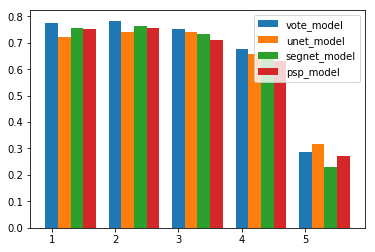

In [100]:
plt.bar(x, vote, width = 0.2,label = 'vote_model')
plt.bar([i + 0.2 for  i in x], unet_list,width = 0.2,label = 'unet_model')
plt.bar([i + 0.4 for  i in x], segnet_list,width = 0.2,label = 'segnet_model')
plt.bar([i + 0.6 for  i in x], pspnet_list,width = 0.2,label = 'psp_model')
plt.legend()

In [70]:

i = 10
print(iou(de(post_deal(post_deal(seg))),cv2.imread(f'/home/shiyi/beshe/gaoxin_map/second_dataset/part{i}_road_500.png',0)))
print(iou(de(post_deal(seg)),cv2.imread(f'/home/shiyi/beshe/gaoxin_map/second_dataset/part{i}_road_500.png',0)))

0.7527674360181879
0.7652640816552994


In [167]:
print(iou(yu,cv2.imread(f'/home/shiyi/beshe/gaoxin_map/second_dataset/part11_road_500.png',0)))


0.7511087146402106


In [27]:
import json

In [47]:
f_psp=open("model/0517pspnet_50_epoch.json","r")
for line in f_psp:
    psp=json.loads(line)
f_seg=open("model/0514segnet_50_epoch.json","r")
for line in f_seg:
    seg=json.loads(line)


In [64]:
seg['train miou'][-1],seg['train loss'][-1],seg['val miou'][-1],seg['val loss'][-1]

(0.9053170939392017,
 0.06660517381387453,
 0.7841351618012238,
 0.09993631461541616)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'segnet_loss')

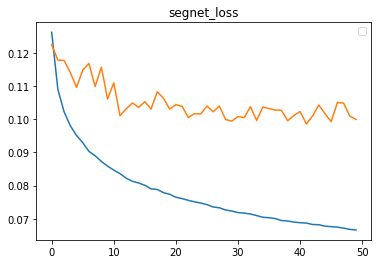

In [65]:
# plt.plot(seg['train loss'],label ='train_loss' )
# plt.plot(psp['val loss'],label ='val_loss' )
plt.plot(seg['train loss'])
plt.plot(seg['val loss'])
plt.legend()
plt.title('segnet_loss')

Text(0.5, 1.0, 'segnet_miou')

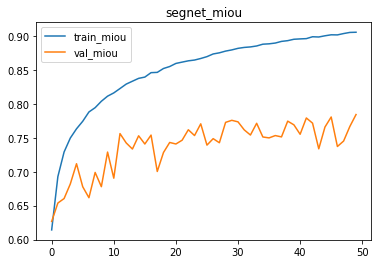

In [67]:
plt.plot(seg['train miou'], label = 'train_miou')
plt.plot(seg['val miou'], label = 'val_miou')
plt.legend()
plt.title('segnet_miou')

In [34]:
import  matplotlib.pyplot as plt

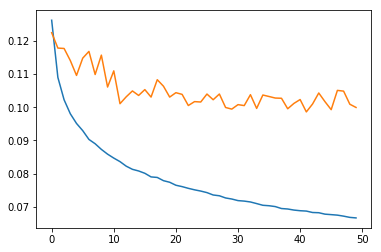

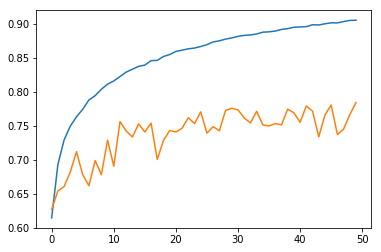

In [43]:
plt.plot(decodes['train miou'])
plt.plot(decodes['val miou'])